# Exemplo 2 Página 27

* Utilize a rede neural percebtron com aprendizagem backpropagation em 3 camadas para resolver o problema de classificação dos pontos

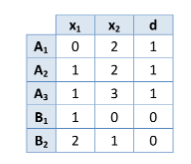

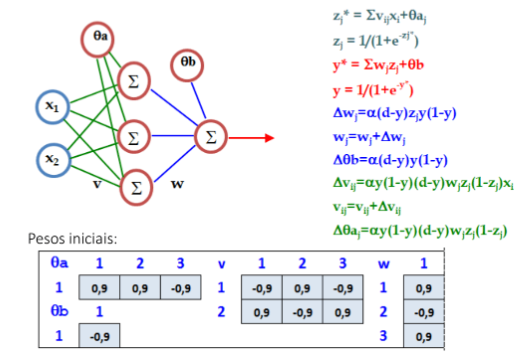


# Entradas

In [1]:
// iniciando a matriz de entradas
// lembrando que c# começa em zero por isso a variável c para corrigir o índice
int c = 1;
int n_linhas = 5;
int n_colunas = 2;
int n_neuronios = 3;
double[,] x = new double[n_linhas,n_colunas];
x[1-c,1-c]=0;
x[1-c,2-c]=2;
x[2-c,1-c]=1;
x[2-c,2-c]=2;
x[3-c,1-c]=1;
x[3-c,2-c]=3;
x[4-c,1-c]=1;
x[4-c,2-c]=0;
x[5-c,1-c]=2;
x[5-c,2-c]=1;


//iniciando vetor da variável resposta
double[] d = new double[n_linhas];
d[1-c]=1;
d[2-c]=1;
d[3-c]=1;
d[4-c]=0;
d[5-c]=0;

//delta alpha e theta iniciais
double alpha = 1;
double[] thetaEscondida = new double[n_neuronios];
thetaEscondida[1-c]=0.9;
thetaEscondida[2-c]=0.9;
thetaEscondida[3-c]=-0.9;
double thetaSaida =-0.9;

//iniciando o vetor de pesos 
double[] w = new double[n_neuronios];
w[1-c] = 0.9;
w[2-c] = -0.9;
w[3-c] = 0.9;

double[,] v = new double[n_colunas,n_neuronios];
v[1-c,1-c] = -0.9 ;
v[2-c,1-c] = 0.9 ;
v[1-c,2-c] = 0.9 ;
v[2-c,2-c] = -0.9 ;
v[1-c,3-c] = -0.9 ;
v[2-c,3-c] = 0.9 ;

double[] z = new double[n_neuronios];


In [2]:
public double ErroQuadraticoMedio(int _n_linhas, int _n_colunas,int _n_neuronios, double[,] _x, double[] _d, double[] _w ,double _thetaSaida,double[] _thetaEscondida,double[,] _v){
    
    double somaQuadradoDaDiferenca = 0;

    int c = 1;
    Console.WriteLine($"=====================================");
    Console.WriteLine($"==========Iniciando cálculo do Erro Quadrático=======");
    Console.WriteLine($"=====================================");
    for(int linha=0;linha<_n_linhas;linha++){
                

        Console.WriteLine($"Entrada:{linha+c}");
        
        // Calculando z
        double[] _z = new double[_n_neuronios];

        for(int j=0;j<_n_neuronios;j++){
            
            double zSoma = 0;

            for(int i=0;i<_n_colunas;i++){
                zSoma+=_v[i,j]*_x[linha,i];
                Console.WriteLine($"_v_{i}_{j}:{_v[i,j]} ,_x_{linha}_{j}:{_x[linha,i]} ");
            }
            _z[j] = zSoma + _thetaEscondida[j];
            _z[j] = 1/(1+Math.Exp(-_z[j]));
            Console.WriteLine($"_z_{j+c}:{_z[j]}");
        }

        double y =0;
        double yEstrela=0;
        //calculando somatório das variáveis da entrada
        for(int j=0;j<_n_neuronios;j++){

            yEstrela += _z[j]*_w[j];

        }

        //adicionando theta ao somatório
        yEstrela = yEstrela + _thetaSaida;
        Console.WriteLine($"yEstrela:{yEstrela}");

        y=1/(1+Math.Exp(-yEstrela));
        
        Console.WriteLine($"y_:{y}");
        var quadradoDiferenca = Math.Pow((_d[linha]-y),2);
        Console.WriteLine($"quadradoDiferenca:{quadradoDiferenca}");
        somaQuadradoDaDiferenca+= quadradoDiferenca;

    }

    Console.WriteLine($"ErroQuadradoMedio:{somaQuadradoDaDiferenca/2}");
    return somaQuadradoDaDiferenca/2;

}

In [3]:

// número máximo de iterações
for(int iteracao = 0;iteracao<10;iteracao++){
    
    Console.WriteLine($"=====================================================");
    Console.WriteLine($"================   iteracao{iteracao+c}  =============");
    Console.WriteLine($"=====================================================");

    //calculando z
    for(int entrada = 0;entrada<n_linhas;entrada++){
    Console.WriteLine($"=====================================================");
    Console.WriteLine($"================   Entrada_{entrada+c}  =============");
    Console.WriteLine($"=====================================================");
        for(int j=0;j<n_neuronios;j++){
            
            double _z = 0;

            for(int i = 0;i<n_colunas;i++){
                Console.WriteLine($"v_{i+c}_{j+c}:{v[i,j]} , x_{entrada+c}_{i+c}:{x[entrada,i]}");
                _z+=v[i,j]*x[entrada,i];
                Console.WriteLine($"_z_{i+c}:{_z}");
            }
            _z = _z + thetaEscondida[j];
            Console.WriteLine($"z*_{j+c}:{_z}");
            _z = 1/(1+Math.Exp(-_z));
            Console.WriteLine($"z_{j+c}:{_z}");
            z[j]=_z;

        }

        //calculando y
        double y=0;
        for(int j=0;j<n_neuronios;j++){
            y += w[j]*z[j];
        }

        y= y+thetaSaida;

        y=1/(1+Math.Exp(-y));

        Console.WriteLine($"y:{y}");

        //Calculando w

        for(int j=0;j<n_neuronios;j++){
            w[j] = alpha*y*(1-y)*(d[entrada]-y)*z[j] + w[j];
            Console.WriteLine($"w_{j+c}:{w[j]}");
        }

        //calculando theta
        thetaSaida = alpha*y*(1-y)*(d[entrada]-y) + thetaSaida;
        Console.WriteLine($"thetaSaida:{thetaSaida}");

        for(int i =0;i<n_colunas;i++){
            for(int j = 0;j<n_neuronios;j++){
                v[i,j]= alpha*y*(1-y)*(d[entrada]-y)*w[j]*z[j]*(1-z[j])*x[entrada,i]+v[i,j];
                Console.WriteLine($"v_{i+c}_{j+c}:{v[i,j]}");
            }
        }

        for(int j = 0;j<n_neuronios;j++){
            thetaEscondida[j]= alpha*y*(1-y)*(d[entrada]-y)*w[j]*z[j]*(1-z[j])+thetaEscondida[j];
            Console.WriteLine($"thetaEscondida_{j+c}:{thetaEscondida[j]}");
        }
    }

    ErroQuadraticoMedio(n_linhas, n_colunas,n_neuronios, x, d, w ,thetaSaida,thetaEscondida,v);
    alpha = alpha*0.95;
}

================   iteracao1  =============
================   Entrada_1  =============
v_1_1:-0,9 , x_1_1:0
_z_1:0
v_2_1:0,9 , x_1_2:2
_z_2:1,8
z*_1:2,7
z_1:0,9370266439430035
v_1_2:0,9 , x_1_1:0
_z_1:0
v_2_2:-0,9 , x_1_2:2
_z_2:-1,8
z*_2:-0,9
z_2:0,289050497374996
v_1_3:-0,9 , x_1_1:0
_z_1:0
v_2_3:0,9 , x_1_2:2
_z_2:1,8
z*_3:0,9
z_3:0,7109495026250039
y:0,5800632596591988
w_1:0,9958506460438941
w_2:-0,8704323488645778
w_3:0,972724686722288
thetaSaida:-0,7977076621422898
v_1_1:-0,9
v_1_2:0,9
v_1_3:-0,9
v_2_1:0,9120219824163687
v_2_2:-0,936594902854595
v_2_3:0,9408954991864701
thetaEscondida_1:0,9060109912081844
thetaEscondida_2:0,8817025485727025
thetaEscondida_3:-0,879552250406765
================   Entrada_2  =============
v_1_1:-0,9 , x_2_1:1
_z_1:-0,9
v_2_1:0,9120219824163687 , x_2_2:2
_z_2:0,9240439648327373
z*_1:1,8300549560409216
z_1:0,8617682735254876
v_1_2:0,9 , x_2_1:1
_z_1:0,9
v_2_2:-0,936594902854595 , x_2_2:2
_z_2:-0,97318980570919
z*_2:-0,09148725713648753
z_2:0,47714412

# Referências
Matéria de metaheurísticas e aplicações - PPGMNE

Siqueira, P.H., "Metaheurísticas e Aplicações". Disponível em: <https://paulohscwb.github.io/metaheuristicas/>, Janeiro de 2021.

### Autor
<a href="https://www.linkedin.com/in/hesauhugocavalcanti/">Hesau Hugo</a>

### Professor
<a href="https://www.linkedin.com/in/paulo-henrique-siqueira-83080130/">Paulo Henrique Siqueira</a>